# Voyager test setup stuff

Sanity checks and grabbing a few key values to pin data to in test routines.

We know there should be Voyager telemetry at around 8419 MHz, let's extract it and make sure we're doing it right,

In [1]:
%matplotlib inline

In [2]:
import blimpy as bl
import numpy as np
import pylab as plt

### Load Fil data using Filterbank (FF) and HDF data using Filterbank (HF)

(16, 1, 39371)
(16, 1, 39371)
(39371,)
(39371,)
3.09333e+11 18960
3.09333e+11 18960
2.74257e+11 18997
2.74257e+11 18997
extracting integration 0...
extracting integration 0...


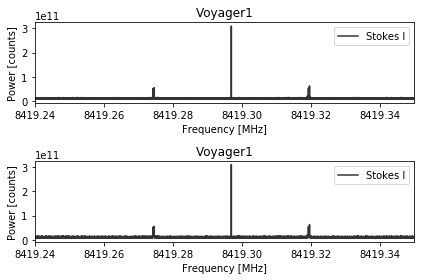

In [6]:
ff = bl.Filterbank('Voyager_data/Voyager1.single_coarse.fine_res.fil', f_start=8419.24, f_stop=8419.35)
hf = bl.Filterbank(voyager_h5, f_start=8419.24, f_stop=8419.35)

print ff.data.shape
print hf.data.shape
print ff.freqs.shape
print hf.freqs.shape

print ff.data[0].max(), ff.data[0].argmax()
print hf.data[0].max(), hf.data[0].argmax()
print ff.data[-1].max(), ff.data[-1].argmax()
print hf.data[-1].max(), hf.data[-1].argmax()

# Assert data is loaded to the same shape and has same values
assert ff.data.shape == hf.data.shape == (16, 1, 39371)
assert np.allclose(ff.data, hf.data)

# Check the Voyager carrier has the known amplitudes at first and last integration
assert np.allclose(ff.data[0].max(), hf.data[0].max(), 3.09333e+11)
assert np.allclose(ff.data[-1].max(), hf.data[-1].max(), 2.74257e+11)

# Check the tone is in the same bin for both
assert ff.data[0].argmax()  == hf.data[0].argmax() == 18960
assert ff.data[-1].argmax() == hf.data[-1].argmax() == 18997

plt.subplot(2,1,1)
ff.plot_spectrum()

plt.subplot(2,1,2)
hf.plot_spectrum()
plt.tight_layout()

Find the max and min values, and visual confirmation

(16, 1, 39370)
(16, 1, 39370)
3.09333e+11 18959
3.09333e+11 18959
2.74257e+11 18996
2.74257e+11 18996
extracting integration 0...
extracting integration 0...


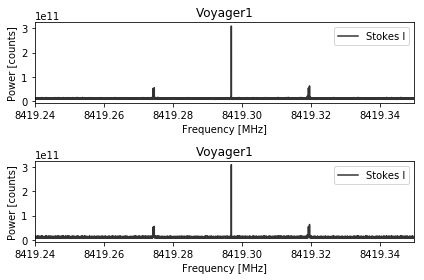

In [7]:
fw = bl.Waterfall('Voyager_data/Voyager1.single_coarse.fine_res.fil', f_start=8419.24, f_stop=8419.35)
hw = bl.Waterfall(voyager_h5, f_start=8419.24, f_stop=8419.35)

print fw.data.shape
print hw.data.shape
print hw.data[0].max(), hw.data[0].argmax()
print fw.data[0].max(), fw.data[0].argmax()
print hw.data[-1].max(), hw.data[-1].argmax()
print fw.data[-1].max(), fw.data[-1].argmax()

# Assert data is loaded to the same shape and has same values
assert hw.data.shape == fw.data.shape == (16, 1, 39370)
assert np.allclose(hw.data, fw.data)

# Check the Voyager carrier has the known amplitudes at first and last integration
assert np.allclose(hw.data[0].max(), fw.data[0].max(), 3.09333e+11)
assert np.allclose(hw.data[-1].max(), fw.data[-1].max(), 2.74257e+11)

# Check the tone is in the same bin for both
assert hw.data[0].argmax() == fw.data[0].argmax() == 18959
assert hw.data[-1].argmax() == fw.data[-1].argmax() == 18996

# And plot
plt.subplot(2,1,1)
fw.plot_spectrum()

plt.subplot(2,1,2)
hw.plot_spectrum()
plt.tight_layout()

### Sanity check: all spectra are the same

extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


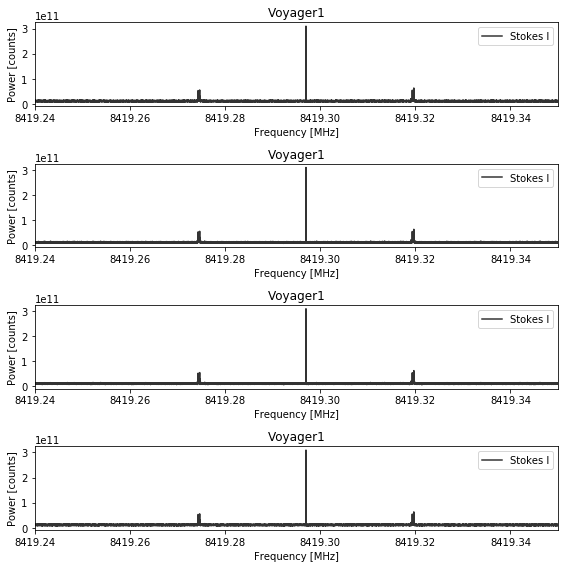

In [8]:
all_readers = [ff, hf, ff, hf]

plt.figure(figsize=(8, 8))
for ii, rr in enumerate(all_readers):
    plt.subplot(4, 1, ii+1)
    rr.plot_spectrum()
plt.tight_layout()

### Loading full file and _then_ plotting extracted portions

In [9]:
ff = bl.Filterbank('Voyager_data/Voyager1.single_coarse.fine_res.fil')
hf = bl.Filterbank(voyager_h5)
fw = bl.Waterfall('Voyager_data/Voyager1.single_coarse.fine_res.fil')
hw = bl.Waterfall(voyager_h5)

extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


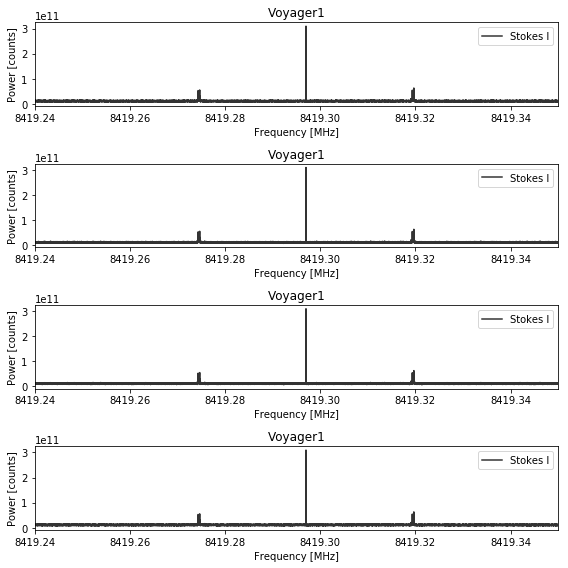

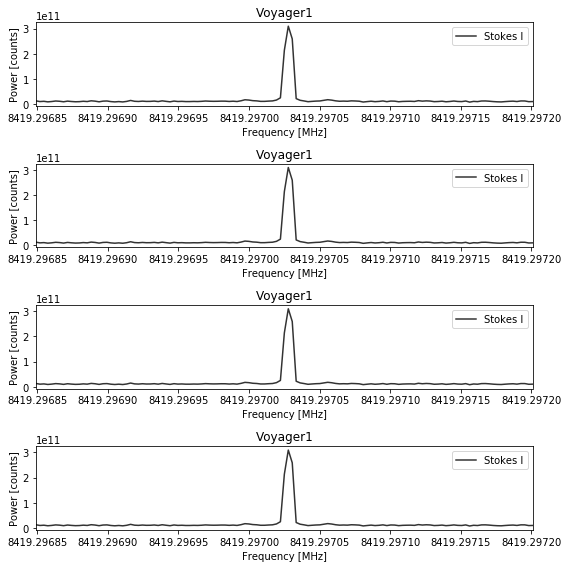

In [10]:
all_readers = [ff, hf, fw, hw]

plt.figure(figsize=(8, 8))
for ii, rr in enumerate(all_readers):
    plt.subplot(4, 1, ii+1)
    rr.plot_spectrum(f_start=8419.24, f_stop=8419.35)
plt.tight_layout()

plt.figure(figsize=(8, 8))
for ii, rr in enumerate(all_readers):
    plt.subplot(4, 1, ii+1)
    rr.plot_spectrum(f_start=8419.29685, f_stop=8419.2972)
plt.tight_layout()

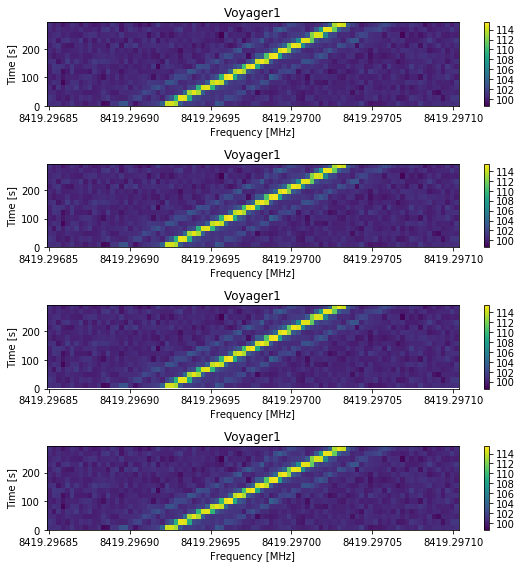

In [11]:
plt.figure(figsize=(8, 8))
for ii, rr in enumerate(all_readers):
    plt.subplot(4, 1, ii+1)
    rr.plot_waterfall(f_start=8419.29685, f_stop=8419.2971)
plt.tight_layout()

In [12]:
for ii, rr in enumerate(all_readers):
    f, d = rr.grab_data(f_start=8419.29, f_stop=8419.30)
    print f.shape, d.shape
    assert f.shape == (3580,)
    assert d.shape == (16, 3580)

for ii, rr in enumerate(all_readers):
    f, d = rr.grab_data(f_start=8419.29685, f_stop=8419.2971)
    print f.shape, d.shape
    assert f.shape == (91,)
    assert d.shape == (16, 91)

(3580,) (16, 3580)
(3580,) (16, 3580)
(3580,) (16, 3580)
(3580,) (16, 3580)
(91,) (16, 91)
(91,) (16, 91)
(91,) (16, 91)
(91,) (16, 91)
